In [2]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [5]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->


# טיפוסים, אופרטורים והשמות חלק א'

### סוגי נתונים (**טיפוסים/types**) ב-Python  
- טיפוסים נפוצים:
    - מספריים: `int` ,`float`
    - לוגיים/בוליאניים: `bool`
    - טקסט/מחרוזת: `str`
- למה צריך סוגים שונים?
    - חיסכון בזיכרון  
    - מהירות ביצוע  
    - לכל טיפוס יש פעולות ייחודיות (**אופרטורים**)
        - לדוגמא, בטיפוסים במספריים ניתן לבצע פעולות חיבור וחיסור 

#### במודול זה נרחיב על כל טיפוס ואילו פועלות ניתן לעשות עליו

### טיפוסים מספריים: `int` ו`float`

In [9]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/r3Zt6XPlzyU?si=4MUoXvX3j38GxC0q" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [9]:
# This is my first Python program!
print(13)
print(10)
print(1+2)
print       (      7    -      4   )
print(3*8) # This line prints 24
print(10/4)
print(2.3+1.7)
print(17 - 3*5)
print((17 - 3)*5)

13
10
3
3
24
2.5
4.0
2
70


בסרטון הכרנו את הטיפוסים המספריים וראינו כיצד לבצע פעולות חשבון בסיסיות על מספרים. ראינו שם שפייתון יודע לעבוד עם מספרים שמכילים נקודה עשרונית, כמו למשל 3.14 או 4.0. 

בפייתון, מספרים עם ובלי נקודה עשרונית הם שני סוגים שונים של נתונים. באופן כללי במדעי המחשב, סוגי הנתונים השונים נקראים טיפוסי-נתונים **(data-types)** או מחלקות **(classes)**. לכל טיפוס יש דרך מסויימת שבה הוא מיוצג בזיכרון של המחשב.

מספרים שלמים ללא נקודה עשרונית, כמו המספרים 4, 0 או 56 - שייכים למחלקה שנקראת `int`, שזה קיצור של **integer**, "מספר שלם" באנגלית.

לעומת זאת, מספרים שמכילים נקודה עשרונית כמו 3.14 שייכים למחלקה אחרת שנקרא `float`, זה קיצור של **floating point** או "נקודה צפה", על שם הייצוג מספר עם נקודה עשרונית.

אפשר לערב באותו ביטוי מספרים משתי המחלקות האלו – `int` ו-`float`. למשל, החישוב 1+2.5 יתן לנו 3.5. תוצאת החישוב שייכת לטיפוס `float` כמובן.

באופן כללי, אם ביטוי חשבוני מכיל גם ערכים מטיפוס `int` וגם ערכים מטיפוס `float`, התוצאה תהיה מטיפוס `float`.

אבל יש מקרים שבהם ביטוי מכיל רק מספרים שלמים מטיפוס `int`, ועדיין התוצאה היא מספר עם נקודה עשרונית. זה מה שקורה כשמחלקים שני מספרים. למשל, אם תדפיסו את תוצאה החישוב `print(10/4)` תקבלו 2.5, מספר מטיפוס `float`, ואיפול אם תחלקו את 10 ב2 `print(5/10)` תקבלו 2.0, מספר מטיפוס `float`, בעוד 2 (בלי הנקודה העשרונית) הוא מטיפוס `int`.  

בהמשך נכיר עוד טיפוסים בשפת פייתון, כאלה שלא מייצגים מספרים אלא סוגי נתונים אחרים.



עד כה ראינו את האופרטורים החשבוניים חיבור (+), חיסור (-), כפל (*), וחילוק (/).

כעת נכיר האופרטור `//`, או  **floor division**.

האופרטור `//` נותן לנו רק את החלק השלם של תוצאת החלוקה. חלק זה נקרא גם המנה של החלוקה, ומכאן השם שבכותרת.
למשל, כאשר מחלקים 10/4, התוצאה היא 2.5. החלק השלם של התוצאה הוא 2, או במילים אחרות 4 נכנס ב-10 פעמיים שלמות (ונשארת עוד שארית של 2). כאשר מחשבים 4//10 מקבלים רק את המנה, כלומר 2.

האופרטור `//` אם כן מעגל את תוצאת החלוקה למטה, כלומר מסיר את השארית שאחרי הנקודה. זו גם הסיבה שבאנגלית קוראים לו **floor division** – חלוקת "רצפה" (כלומר חלוקה שמעוגלת לרצפה, למטה).

להלן מספר דוגמאות שדרכן נבין את ההבדל בין `/` ל`//`. הוסיפו פקודות דומות אם אתם מרגישים צורך לראות עוד דוגמאות:

In [11]:
# Division examples
print(10/4, 10//4)
print(10/3, 10//3)
print(3/4, 3//4)


2.5 2
3.3333333333333335 3
0.75 0


חישוב החלק השברי, זה שמיוצג על ידי הספרות שאחרי הנקודה ונקרא שארית או **modulo** ומחושב באמצעות האופרטור `%`. 



In [12]:
# Modulo examples
print(10%4)
print(10%4)
print(3%4)

2
2
3


פעולה אריתמתית נוספת שנראה כעת היא פעולה ה**חזקה**, המיוצגת ע"י 2 כוכביות `**`

In [30]:
print(4**3)
print(3**0)


64
1


<h4 style='color:purple'>
בחנו את עצמכם
</h4>

In [5]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה ההבדל בין שני האופרטורים / ו- // כאשר הם מופעלים על מספרים מטיפוס int ותוצאת החלוקה היא מספר שלם (ללא שארית)? לדוגמה, מה ההבדל בין 10/5 ל 5//10?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לחץ כאן כדי לגלות את התשובה",
                "correct": true,
                "feedback": "10/5 הוא ביטוי שערכו 2.0. לעומת זאת, 5//10 הוא ביטוי שערכו 2. כלומר הערך הראשון הוא מטיפוס float ואילו השני מטיפוס int. באופן כללי, כאשר a ו-b הם מספרים מטיפוס int ביטוי מהצורה a/b יהיה תמיד מטיפוס float, בעוד ביטוי מהצורה a//b יהיה תמיד מטיפוס int."
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [34]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תהיה תוצאת הפעולה 10%5?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לחץ כאן כדי לגלות את התשובה",
                "correct": true,
                "feedback": "השארית של חלוקת 10 ב5 היא 0 ולכן התוצאה תהיה 0"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [35]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה תהיה תוצאת הפעולה 0.5**4?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "לחץ כאן כדי לגלות את התשובה",
                "correct": true,
                "feedback": " תוצאת הפעולה תהיה 2.0 מכיוון שחזקת 0.5 היא למעשה פעולת שורש. שימו לב שטיפוס  התוצאה הוא float"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

#### עבור כל אחד מהביטויים הבאים, ענו האם הוא מטיפוס int או float:

In [13]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "3*4",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "float",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [14]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "1.8+1.2",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "float",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [15]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "30/6",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "float",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [16]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "5//31",
        "type": "many_choice",
        "answers": [
            {
                "answer": "int",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "float",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

### סיכום פעולות אריתמתיות

| אופרטור | שימוש  | תיאור                                                                 |
|----------|--------|------------------------------------------------------------------------|
| +        | x + y  | סכום של x ו־y                                                          |
| -        | x - y  | חיסור y מ־x                                                             |
| *        | x * y  | כפל של x ב־y                                                            |
| **       | x ** y | חזקה של x בחזקת y                                                      |
| /        | x / y  | חילוק של x ב־y                                                         |
| //       | x // y | חילוק שלם של x ב־y: מחזיר את החלק השלם (מעוגל למטה) של תוצאת החילוק |
| %        | x % y  | מודולו: השארית של החילוק של x ב־y                                     |


### טיפול בשגיאות (או מה קורה כאשר כתבנו משהו או נכון?) 

In [19]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0GofXMPUBek?si=bjzIa0R9iv-fA7lU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style='color:purple'>
בחנו את עצמכם
</h4>

חלונית הקוד שלפניכם מופיעה תוכנית בה חלק מהשורות גורמות לשגיאה. עליכם לתקן את כל השגיאות כך שהתוכנית תרוץ עד סופה (ובפרט, בסוף תודפס המילה "success"). ניתן לתקן את השגיאות בכל דרך שתרצו, אך אסור למחוק את כל השורה של פקודה שגורמת לשגיאה.

In [20]:
print( 1 + 2 - 3 * 4 / 5 ! 6)
print(12.3 ** 8 + (12 - 4))
print(14 / (7 - (4 + 3)))
print( 2 + 4) * 6)
print ("<h3>success!</h3>")

SyntaxError: unmatched ')' (3579508377.py, line 4)

### משתנים (**variables**) והשמות (**assignment**)

### אחסון נתונים בזיכרון  
- תוכניות מחשב מעבדות נתונים  
- הנתונים מתקבלים כקלט או מחושבים ע"י התוכנית  
- כדי להשתמש בהם שוב בהמשך – צריך לזכור אותם  
- לכן, תוכניות משתמשות במשתנים (**variables**) כדי לשמור נתונים בזיכרון  
- לכל משתנה יש:
    - ערך (התוכן, הנתונים עצמם)
    - שם (קיצור דרך לכתובת בזיכרון)
    - טיפוס (type): סוג המשתנה. לדוגמא:
        -  טיפסים שכבר הכרנו: מספרים -`int` ו`float`
        -  טקסט/מחרוזת (`str`) וערכים לוגיים (`bool`), אותם נכיר בהמשך 

### משתנים בתוכנית  
- לכל משתנה יש: שם, ערך, סוג (וכתובת בזיכרון)  
- ב-Python יוצרים משתנים ע"י השמת ערך לשם:



```python
s = "bob"
r = True
age = 35

```

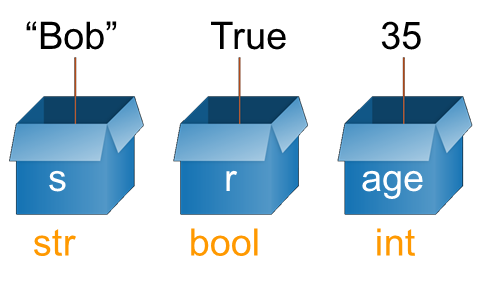

טיפוסי המשתנים נקבעים אוטומטית לפי ערכים שהוכנסו אליהם והפעולות שבוצעו עליהם

### סוגי נתונים – דוגמא

```python
n = 17
pi = 3.14159
message = "what's up Doc?"
b = True
```

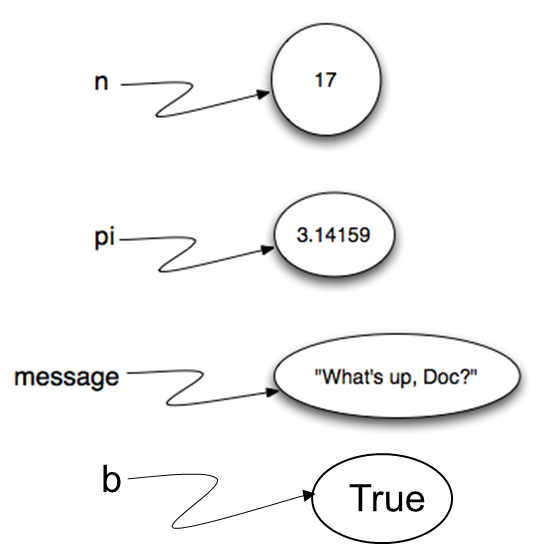

In [25]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/_mHztcKrRD8?si=-Lk6recWKHAr5tiz" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style="color:purple">
בחנו את עצמכם
</h4>

1. עבור קטע הקוד הבא, קבעו מהו ערכם של המשתנים x,y,z בתום ריצת הקוד

In [37]:
x = 12 
y = 7 
z = x - y 
x = z*2 + 3 
y = z - x + 16

2.  הגדירו שני משתנים - x ו-y. ערכו של x יהיה הגיל שלכם (בשנים), וערכו של y יהיה 3 הספרות האחרונות של מספר הטלפון שלכם (אם הספרה הראשונה מבין ה-3 היא 0 - התעלמו ממנה. למשל: אם 3 הספרות הן 012, אז y = 12).

    הדפיסו – באמצעות הפקודה print – את סכום המשתנים (x+y), הפרש המשתנים (x-y), מכפלת המשתנים (x*y) ומנת המשתנים (x/y). בידקו שהתוצאות אכן נכונות על ידי חישוב ידני או שימוש במחשבון.

In [39]:
# Write your solution here

### השמה למשתנים
- צד שמאל = שם משתנה  
- צד ימין = ביטוי  

```python 
n = 10
m = (10 + 4) * 5
```
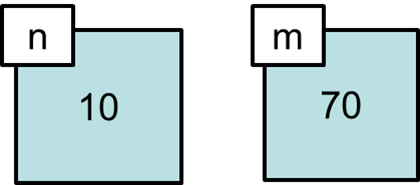

- שם של משתנה: מורכב מאותיות וספרות, ומתחיל באות  
 
**המפרש (interpreter):**  
- מחשב את הביטוי  
- משייך את הערך לשם המשתנה  

### משתנים והשמות – דוגמה  

- שינוי ערך של משתנה

In [ ]:
n=10
print(n)

In [ ]:
n=11
print(n)

- שינוי סוג של משתנה 

In [ ]:
print(type(n))
n = 1.3141
print(type(n)) 

- ניתן להשתמש במשתנים בתוך ביטויים  

In [ ]:
pi = 3.14159
print(pi * 2 + 1)

- שימוש במשתנה שלא הוגדר יגרום לשגיאת ריצה

In [ ]:
check_this

### דוגמאות נוספות להשמה

<h4 style="color:purple">
התנסו עצמכם
</h4>

In [ ]:
a=3
print(a)
b=5
print(b)
c = a + b
print(c)
c = c * 2
print(c)
print(b**a)
print(b/a)
print(b//a)
print(b%a)

### הפקודה `type` מחזירה את סוג המשתנה או הביטוי

In [ ]:
a=5
print(a)

In [ ]:
print(type(4))

In [ ]:
print(type(3.14159))

### הבנת קוד באמצעות Python tutor

In [37]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/nSktoxcZA9Q?si=Tp5wvQgfBHbfkeV1" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

<h4 style="color:purple">
התנסו בעצמכם
</h4>

לפניכם מוצגת חלונית של Python Tutor ובה הקוד אותו ראינו בסרטון. הריצו את הקוד בצורה מבוקרת, כפי שראינו בסרטון. שימו לב איך המשתנים נוצרים ומשתנים בצד ימין של החלונית, וכיצד הפלט מופיע בחלונית הפלט. כשאתם מרגישים שהבנתם איך משתמשים ב-Python Tutor, אתם מוזמנים להמשיך ליחידה הבאה.

In [38]:
%%html
<iframe width="800" height="400" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=x%20%3D%2010%0Ay%20%20%3D%207%0Ax%20%3D%2011%0Aprint%28x%29%0Aresult%20%3D%20x%20%2B%20y%0Aprint%28result%29%0Aresult%20%3D%20result%20%2B%201%0Aprint%28result%29&amp;codeDivHeight=400&amp;codeDivWidth=350&amp;cumulative=false&amp;curInstr=0&amp;heapPrimitives=nevernest&amp;origin=opt-frontend.js&amp;py=3&amp;rawInputLstJSON=%5B%5D&amp;textReferences=false"> </iframe>

### השוואות בין מספרים

In [28]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/g07UI_J-Cng?si=IwnyDfKcV2GN0g0G" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם.**

In [44]:
#print(3 < 4)
#print(3 > 4)
x = 3
y = 4
# print(x*2 < y  + 1)
# print(x==y)
# print(x+1 == y)
# x = y
# print(x)
# print(y)a
# print(3 != 4)
# print(3 <= 4)
# print(3 <= 3)
# print(3 >= 4)
print(3 >= 3)

True


#### בחנו את עצמכם

In [51]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה מדפיסה הפקודה הבאה: print(3 * 2 != 6)",
        "type": "many_choice",
        "answers": [
            {
                "answer": "מודפסת הודעת שגיאה - התחביר לא תקין בגלל השימוש בסימן !",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "False",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "True",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [61]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "מה מדפיסה הפקודה הבאה: print(3 <= 3)",
        "type": "many_choice",
        "answers": [
            {
                "answer": "הודעת שגיאה - לא ניתן להפעיל את האופרטור => על שני מספרים שווים.",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "False",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "True",
                "correct": true,
                "feedback": "נכון!"

            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

לפניכם קטע קוד ובו 3 משתנים - x,y,z. המשתנים מאותחלים ל-0. לאחר אתחול המשתנים, ישנן מספר הדפסות של פעולות השוואה הכוללות את המשתנים הנ"ל. עליכם לשנות את ערכם של x,y,z עד שכל ההדפסות מדפיסות True.

רמז: יש לפחות משתנה אחד שעבורו יש מספר ערכים שיובילו לפתרון נכון, ויש לפחות משתנה אחד שעבורו יש רק ערך אחד אפשרי.

נסו להבין מיהו המשתנה שעבורו רק ערך אחד אפשרי, והמשיכו משם. בנוסף, הפתרון עשוי לכלול ערכים שאינם שלמים.

In [ ]:
x = 0
y = 0
z = 0
print(x + y < z)
print(3*x == 2*y)
print(z < 20)
print(x + 1 == 6)
print(y / 3 >= 2)

### סיכום אופרטורי השוואה  
- משווים בין משתנים ומחזירים ערך בוליאני (True / False)


| אופרטור   | שם            | תיאור                                                                 |
|-----------|----------------------|------------------------------------------------------------------------|
| x < y     | קטן מ־               | אמת אם x קטן מ־y, אחרת שקר.                                           |
| x > y     | גדול מ־              | אמת אם x גדול מ־y, אחרת שקר.                                          |
| x <= y    | קטן או שווה ל־       | אמת אם x קטן או שווה ל־y, אחרת שקר.                                   |
| x >= y    | גדול או שווה ל־      | אמת אם x גדול או שווה ל־y, אחרת שקר.                                  |
| x == y    | שווה                 | אמת אם x שווה ל־y, אחרת שקר.                                          |
| x != y    | שונה                 | אמת אם x שונה מ־y, אחרת שקר.                                          |


<h4 style="color:red">שימו לב</h4>

- הערכים True וFalse פעולות ההשוואה הן מטיפוס בוליאני (`bool`). נרחיב את טיפוס זה בהמשך
- כל אופרטורי ההשוואה שראינו כאן רלוונטיים גם לטיפוסים אחרים יכולים להיות מופעלים גם על טיפוסים אחרים כמו `bool` ו`str`. גם על כך נרחיב בהמשך

In [ ]:
print(5==5.0)

In [ ]:
print(6!=2*3)

In [ ]:
print(3<=3)

In [ ]:
x=3<3
print(x, type(x))

In [ ]:
print('a'!='b')

In [ ]:
print(-2>=1)

## מחרוזות  


על מנת לייצג טקסט, נשתמש בערכים מסוג מחרוזת (**string**). בפייתון, שם הטיפוס הוא `str`

מחרוזת מיוצגת ע"י רצף סדור של תווים המוקף בגרשיים או בגרש בודד. לדוגמא, "hello world' או "hello world'

In [42]:
s = "hello world"
print(s)
print(type(s))

hello world


In [39]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/nYMuU3aowfM?si=yRZeaGjz_vr2oQZe" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם.**

In [ ]:
# print(Hello world!)
# print(3)
# print("3")
# print(3 + "3")
s = "This is a string"
# print(s)
print("3+4 =", 3*4)

<h4 style="color:purple">
בחנו את בעצמכם
</h4>

בתרגיל זה תדפיסו מחרוזת מורכבת שתדפיס את שמכם ואת גילכם.
תחילה, הגדירו שני משתנים:

המשתנה הראשון ייקרא name וערכו יהיה מחרוזת עם השם שלכם.
המשתנה השני ייקרא age וערכו יהיה הגיל שלכם בשנים.

לדוגמה: סטודנטית בת 22 בשם הילה תגדיר את המשתנים הבאים:


```python
name =  "Hila"
age =  22
```

לאחר מכן, עליכם להדפיס מחרוזת מורכבת (תוך שימוש בפקודה print עם פסיקים, כפי שהודגם בסרטון) שתדפיס את השם ואת הגיל לפי הפורמט הבא:

```python
"My name is <your name> and I am <your age> years old"
```


כאשר במקום <your name> יופיע השם שלכם כפי שהוגדר במשתנה name, ובמקום <your age> יופיע הגיל שלכם כפי שהוגדר במשתנה age. למשל, כאשר הסטודנטית הילה, אותה פגשנו זה עתה, תריץ את הקוד שלה, יודפס:

```python
"My name is Hila and I am 22 years old"
```

רמז: כדי לייצר מחרוזות מורכבות יש להפריד בין חלקי המחרוזת בעזרת פסיקים.

In [45]:
### write your code here

### פעולות על מחרוזות

In [40]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gXgRasJdBKs?si=2acga8sLqyc2Cq0d" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם.**

In [46]:
# print("Hello " + "World")
# print("Hello" + " " + "World")
# print("Hello" * 3)
s1 = "Hello"
s2 = s1 * 3
# print(s2)
# print(("Hello" + "World") * 2)
# print(len("a b c d e"))
# print(len(""))
# print("H" in "Hello")
# print("ell" in "Hello")
# print("G" in "Hello")
print("bell" in "Hello")

False


<h4 style="color:purple">
בחנו את בעצמכם
</h4>

מה מודפס בקטע הקוד הבא:

```python
s="ab"
print(s*(len(s)+len("")))
```

In [49]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "type": "many_choice",
        "answers": [
            {
                "answer": "ab",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "abab",
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "answer": "2",
                "correct": false,
                "feedback": "לא נכון"
            },
            {
                "answer": "מחרוזת ריקה",
                "correct": false,
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [ ]:
print(s[0])
print(s[-1])

### אינדקסים של מחרוזות

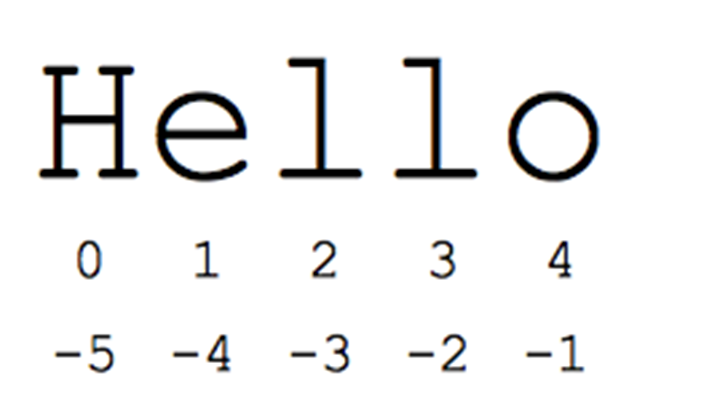

In [ ]:
a = 'Hello'

In [ ]:
print(str.find(a, 'H'))
print(a.find('H'))

In [ ]:
print(a[0])
print(a[1])
print(a[-1])
print(a[4])

In [ ]:
print(a[5])

### גישה לתווים בתוך מחרוזת  

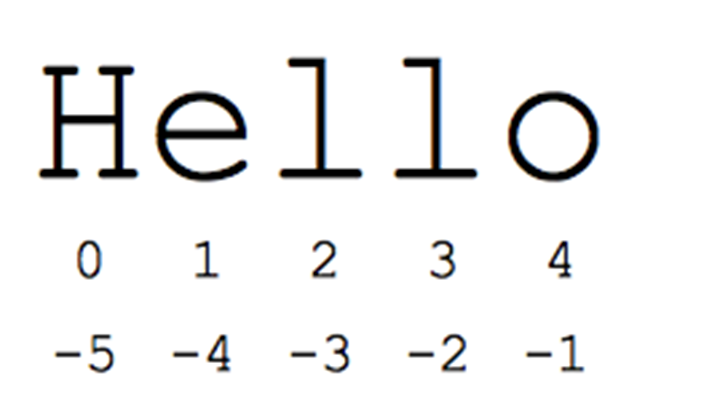

In [ ]:
a = 'Hello'

In [ ]:
print(a[1])
print(a[1:3])
print(a[1:])

In [ ]:
print(a[-4:-2])
print(a[:-3])
print(a[-3:])

In [50]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/G9f1tHkVKOk?si=HN2R0Eb_qszSkWvF" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחותכם חלונית עם הקוד שראינו בסרטון. מוזמנים להריץ בעצמכם:**

In [51]:
#print("ab" == "ab")
#print("ab" != "ab")
#print("ab" < "cd")
#print("abc" < "!@#")
s = "Python"
# print(s[0])
# print(s[1])
# print(s[2])
# print(s[3])
# print(s[4])
# print(s[5])
#print(s[6])
print(s[len(s) - 1])

n


###  סיכום: אופרטורים של מחרוזות

| אופרטור    | תיאור                                                                 | דוגמה                                 |
|------------|----------------------------------------------------------------------|----------------------------------------|
| +          | שרשור - מחבר ערכים משני צידי האופרטור                                | `a + b` יתן `'HelloPython'`            |
| *          | חזרה - יוצר מחרוזות חדשות ע״י שרשור חוזר של אותה מחרוזת             | `a*2` יתן `'HelloHello'`               |
| []         | חיתוך - מחזיר תו לפי מיקום נתון במחרוזת                             | `a[1]` יתן `'e'`                        |
| [:]        | חיתוך טווח - מחזיר תווים בטווח נתון                                 | `a[1:4]` יתן `'ell'`                    |
| `in`       | בדיקת חברות - מחזיר אמת אם תו קיים במחרוזת                          | `'H' in a` יתן `True`                  |
| `not in`   | בדיקת אי-חברות - מחזיר אמת אם תו לא קיים במחרוזת                   | `'M' not in a` יתן `True`              |


### ייצוג מחרוזות במחשב  
- לכל תו במחרוזת יש מספר לפי טבלת ASCII  
- המחרוזות נשמרות בזיכרון כרצף מספרים בינאריים  
- ב-Python:
    - `\n` מייצג ירידת שורה
` מייצג ירידת שורה  
    - `\t` מייצג טאב

### טבלת ASCII 

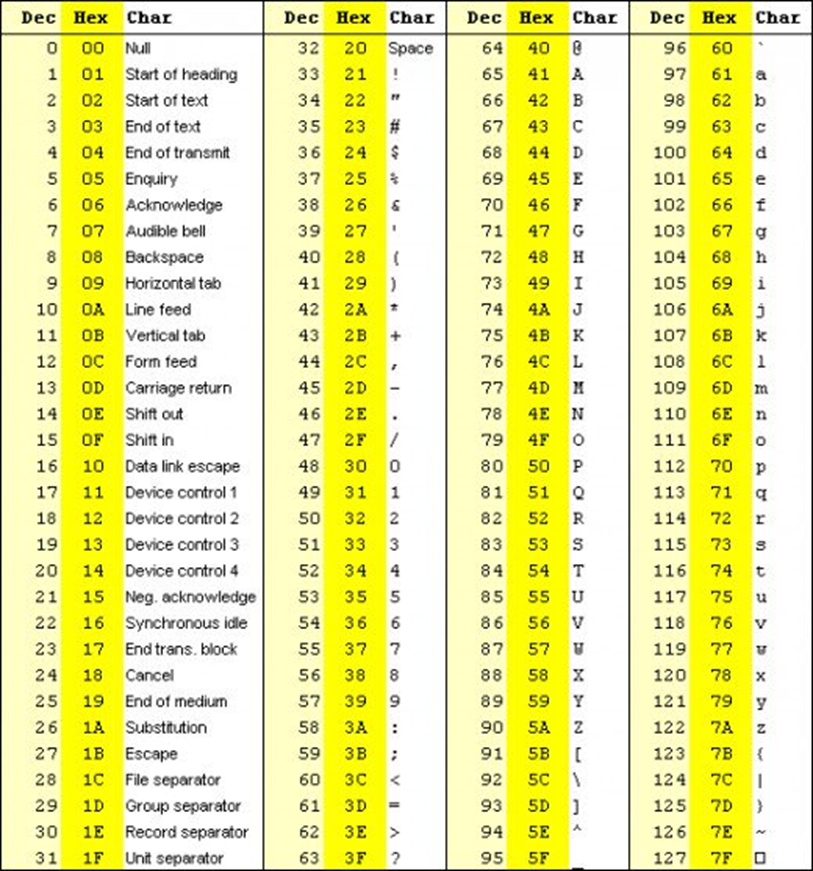

### מחרוזות הן אובייקטים בלתי ניתנים לשינוי (immutable objects)  
- לא ניתן לשנות מחרוזת קיימת 

In [ ]:
a = "abc"
a[0] = "d"

- ניתן להצביע עם משתנה קיים על מחרוזת חדשה

In [ ]:
a="abc"
print(a)
a="gggg"
print(a)

#### אובייקטים בלתי ניתנים לשינוי  
- אובייקטים אלו לא ניתנים לשינוי לאחר יצירתם  
- כל פעולה מחזירה משתנה חדש במקום לשנות את המקורי  

In [ ]:
a = "hello"
b = a.title()
print("a value is:", a)
print("b value is:", b)

### פונקציות של מחרוזות (שיטות)  
- טיפוס `str` ב-Python ישנן שיטות רבות  

In [ ]:
print(str.upper('Assaf'))
print(str.upper('Assaf'))
print(str.lower('Noga'))
print(str.replace('Python class occurs on Mondays', 'Mondays', 'Tuesdays'))
print('Py' + 'thon')
print(str.title('python course for engineers'))
print(str.title(str.replace('Python class occurs on Mondays', 'Mondays', 'Tuesdays')))
print('repeat' * 4)

### פונקציות נוספות של מחרוזות  
- **`len`**  
- `find`, `startswith`, `endswith`  
- `isalpha`, `isdigit`, `islower`  
- `join`, `replace`  
- `strip`, `rstrip`  
- `split`

**<span style="color:red">השיטות האלו חשובות מאוד! חובה להכיר אותן כדי לפתור בעיות רבות.</span>**

למידע נוסף: http://www.tutorialspoint.com/python/python_strings.htm  
חפשו בגוגל שיטות נוספות של `str`…


## המרות טיפוסים  
- באופן עקרוני ניתן לבצע המרה מכל טיפוס לכל טיפוס.
- ההמרה תתבצע בהצלחה רק אם הערך שאותו מנסים למהיר "הגיוני" עבור טיפוס אליו מנסים להמיר
    - לדוגמא את המחרוזת "12" נוכל להמיר לטיפוסים `int` ו`float`, אך "10.5" נוכל להמיר בהצלחה ל`float` בלבד, ואת "hello world" לא ניתן להמיר בהצלחה באף אחד מהטיפוסים הללו
    - לעומת זאת, ניתן להמיר כל מספר (`int` ו`float`) ל`str`
- המרה שנכשלת תחזיר שגיאה
- ניתן לבצע המרה גם לטיפוסים שנלמד בהמשך



<h4 style="color:purple">
התנסו בעצמכם
</h4>

In [ ]:
num = 123
print(num, type(num))
num_str = str(num)
print(num, type(num))
num_float = float(num)
print(num_float, type(num_float))

## טיפוס בוליאני ואופרטורים בוליאניים

**טיפוס בוליאני** מייצג אמת ושקר, כלומר קיימים רק 2 ערכים אפשריים בלבד לטיפוס זה: `True` ו-`False`. 

#### שימו לב 
- `True` ו-`False` הן מילים שמורות בשפה (בדומה ל`+` '=' וכו'), כלומר, לא ניתן להשתמש בהם לצרכים אחרים כמו הגדרת משתנים
- `True` ו-`False` תמיד יופיעו עם אות גדולה בהתחלה ואותיות קטנות בהמשך
  
טיפוסים בוליאניים שימושיים בבדיקות שנעשה על הנתונים שלנו הם התוצאות של פעולות ההשוואה שכבר פגשנו, וניתן להמשתמש בהם גם לצורך בניית תכניות מורכבות באמצעות תנאים ולולאות כפי שנראה בהמשך

In [136]:
a = True
b = 2>1 
c = False
d = 1>2

**אופרטורים בוליאניים** פועלים על ערכים בוליאניים ומחזירים ערך בוליאני  

קיימים שלושה אופרטורים לוגיים: `and` `or` ו-`not`

#### האופרטור `and`

- תחביר: `a and b`
- מחזיר True אם גם a וגם b הם True. אחרת, מחזיר False 

| a | b | a and b |
|--------|--------|-------------------|
| True   | True   | True              |
| True   | False  | False             |
| False  | True   | False             |
| False  | False  | False             |

דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [142]:
a=True
b=True
print(a and b)

a=2>1
b=2<1
print(a and b)


print(False and False)

True
False
False


#### האופרטור `or`

- תחביר: `a and b`
- מחזיר True אם לפחות אחד מהמשתנים a או b הם True. אחרת, מחזיר False 

| a | b | a or b |
|--------|--------|-------------------|
| True   | True   | True              |
| True   | False  | True             |
| False  | True   | True             |
| False  | False  | False             |

דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [ ]:
a=True
b=True
print(a or b)

a=2>1
b=2<1
print(a or b)


print(False or False)

#### האופרטור `not`

- תחביר: `not a`
- מחזיר True אם a הוא False. אחרת, מחזיר True 

| a | not a |
|-------|---|
| True   | False |
| False  | True


דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [144]:
a=True
print(not a)

a=2<1
print(not a)


print(not False)

False
True
True


#### שירשור אופרטורים לוגיים

בדומה לפעולות אריתמתיות, ניתן לשרשר מספר אופרטורים לוגיים ברצף
סדר פעולות:
- `and` קודם ל`or`(כמו שכפל קודם לחיבור)
- `not` קודם לכולם

דוגמא
<h4 style="color:purple">
נסו בעצמכם
</h4>

In [150]:
print (True and True and False)

print ((2>1 or 1<2) and 1==1)
print ((2>1 or 1<2) and 1==1)
print ((2>1 or 1<2) and not 1==1)
print (not 2==2 or 1==1)


False
True
True
False
True


#### סיכום אופרטורים לוגיים

| אופרטור     | תיאור                                                                 |
|-------------|------------------------------------------------------------------------|
| x and y     | שניהם נכונים: `True`, אחרת: `False`                                   |
| x or y      | לפחות אחד מהם נכון: `True`, אחרת: `False`                             |
| not x       | אם x הוא `False` --> התוצאה היא `True`, אם x הוא `True` --> התוצאה היא `False` |
